In [4]:
import numpy as np
import pandas as pd

In [19]:
# read data
data = pd.read_csv(
    "Data/zomato_clean.csv",
    on_bad_lines="skip",   # skips problematic rows
    engine="python"
)

data.head()

,Unnamed: 0,restaurent,online_order,book_table,rating,votes,location,rest_type,food_type,cost,reviews_list,type,city
0,0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26714 entries, 0 to 26713
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    26714 non-null  int64  
 1   restaurent    26714 non-null  object 
 2   online_order  26714 non-null  object 
 3   book_table    26714 non-null  object 
 4   rating        26714 non-null  float64
 5   votes         26714 non-null  int64  
 6   location      26714 non-null  object 
 7   rest_type     26714 non-null  object 
 8   food_type     26714 non-null  object 
 9   cost          26714 non-null  int64  
 10  reviews_list  26714 non-null  object 
 11  type          26714 non-null  object 
 12  city          26714 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 2.6+ MB


In [21]:
data.columns

Index(['Unnamed: 0', 'restaurent', 'online_order', 'book_table', 'rating',
       'votes', 'location', 'rest_type', 'food_type', 'cost', 'reviews_list',
       'type', 'city'],
      dtype='object')

In [ ]:
data.shape

(51717, 17)

In [ ]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
# reomve columns
data.drop(['url','address','menu_item','phone','dish_liked'],axis=1,inplace=True)

In [ ]:
data.shape

(51717, 12)

In [ ]:
data.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


## Data Cleaning

In [ ]:
# reanme columns
data.rename(columns={"name":"restaurent",
                     "rate":"rating",
                     "cuisines":"food_type",
                     "listed_in(type)":"type",
                     "listed_in(city)":"city",
                     "approx_cost(for two people)":"cost"},inplace=True)

In [ ]:
data.head()

,restaurent,online_order,book_table,rating,votes,location,rest_type,food_type,cost,reviews_list,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [ ]:
data.isna().sum().sum()

8414

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(43533, 12)

In [ ]:
# clean indivudual columns

In [ ]:
data.groupby('restaurent').count()

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,reviews_list,type,city
restaurent,,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6,6
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
i-Bar - The Park Bangalore,11,11,11,11,11,11,11,11,11,11,11
iFruit Live Ice Creams,4,4,4,4,4,4,4,4,4,4,4
iSpice Resto Cafe,7,7,7,7,7,7,7,7,7,7,7


In [ ]:
data['restaurent'] = data['restaurent'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [ ]:
data.groupby('restaurent').count()

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,reviews_list,type,city
restaurent,,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6,6
100C,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
i-Bar - The Park Bangalore,11,11,11,11,11,11,11,11,11,11,11
iFruit Live Ice Creams,4,4,4,4,4,4,4,4,4,4,4
iSpice Resto Cafe,7,7,7,7,7,7,7,7,7,7,7


In [ ]:
# cafe - caf | caf

In [ ]:
data.online_order.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data.book_table.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data.rating.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
replace = lambda x:x.replace('/5',"")
l = []
for val in map(replace,data['rating']):
    if val != 'NEW' and val != '-':
        var = float(val)
    l.append(var)
data['rating'] = l

In [ ]:
data.rating.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
data['votes'].isnull().value_counts()

votes
False    43533
Name: count, dtype: int64

In [ ]:
data.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [ ]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [ ]:
data.food_type.unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [ ]:
data.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [ ]:
data['cost'] = data['cost'].apply(lambda x:x.replace(",","")).astype(int)

In [ ]:
data.cost.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500])

In [ ]:
data.cost.dtype

dtype('int32')

In [ ]:
data.columns

Index(['restaurent', 'online_order', 'book_table', 'rating', 'votes',
       'location', 'rest_type', 'food_type', 'cost', 'reviews_list', 'type',
       'city'],
      dtype='object')

In [ ]:
data.type.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [ ]:
data.city.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [ ]:
data.duplicated().value_counts()

False    43484
True        49
Name: count, dtype: int64

In [ ]:
data.drop_duplicates(keep='last',inplace=True)
data.reset_index(drop=True,inplace=True)

In [ ]:
data.duplicated().value_counts()

False    43484
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43484 entries, 0 to 43483
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurent    43484 non-null  object 
 1   online_order  43484 non-null  object 
 2   book_table    43484 non-null  object 
 3   rating        43484 non-null  float64
 4   votes         43484 non-null  int64  
 5   location      43484 non-null  object 
 6   rest_type     43484 non-null  object 
 7   food_type     43484 non-null  object 
 8   cost          43484 non-null  int32  
 9   reviews_list  43484 non-null  object 
 10  type          43484 non-null  object 
 11  city          43484 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 3.8+ MB


In [22]:
data.to_csv("Data/zomato_clean.csv")

## Data Visualization

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# load clean data
data = pd.read_csv("Data/zomato_clean.csv",index_col=0)
data.head()

,Unnamed: 0,restaurent,online_order,book_table,rating,votes,location,rest_type,food_type,cost,reviews_list,type,city
0,0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [ ]:
data.shape

(43484, 12)

1. How many restaurants accpeting online order for zomato?

In [26]:
data.online_order.value_counts()


online_order
Yes    17992
No      8722
Name: count, dtype: int64

<Axes: xlabel='online_order'>

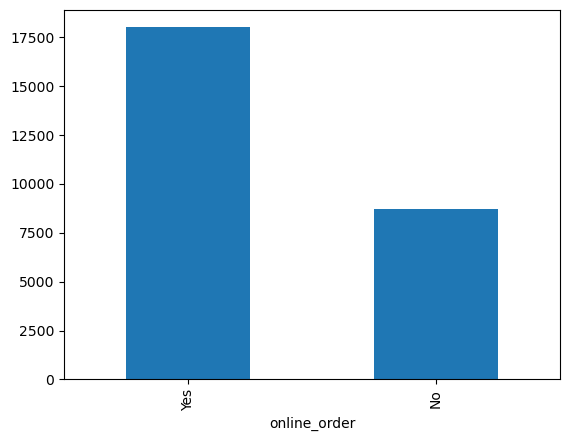

In [27]:
data.online_order.value_counts().plot(kind ='bar')

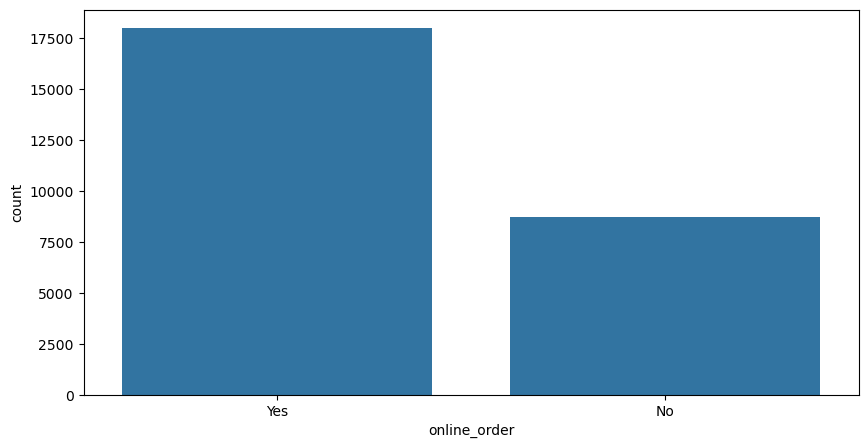

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='online_order',data=data)
plt.show()

Given the dataset, There are 28163 restaurents which delivers online and reamining 15321 dose not deliver online.

2. Find best location by seeing dataset.

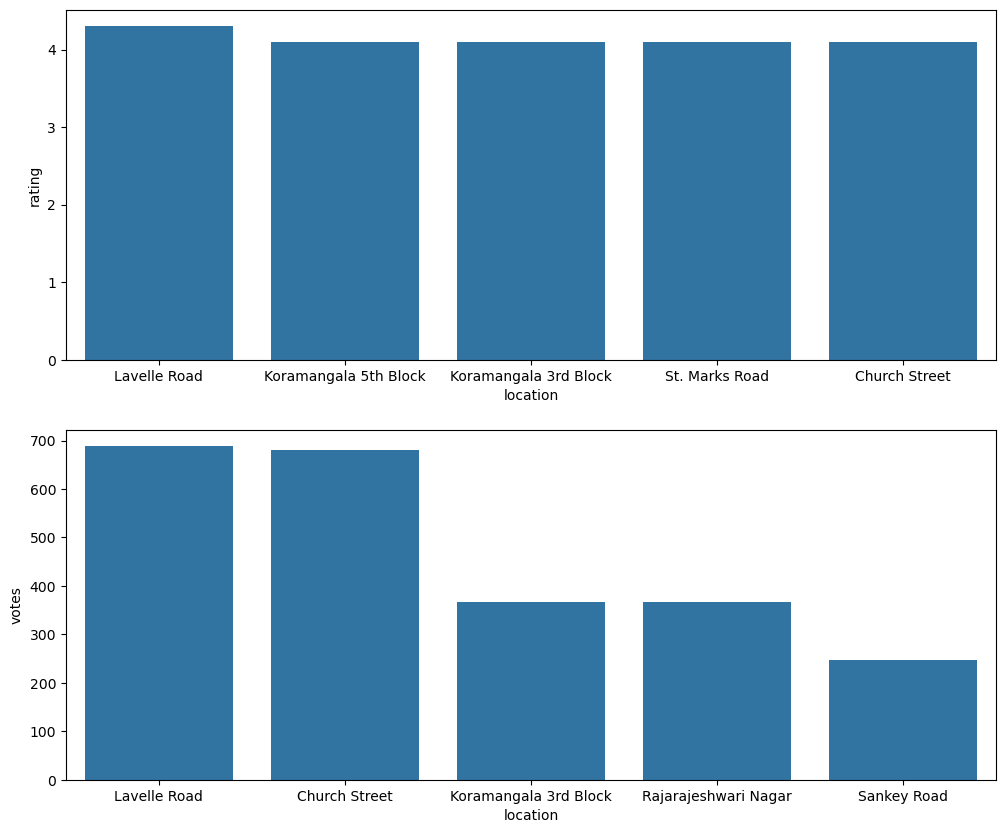

In [ ]:
plt.figure(figsize=(12,10)) # seeting graph size using matplotlib
ax = plt.subplot(2,1,1)   # use of Subploting


# sorting location on avg of ratings in descending order and reading first 5 values
loc_rating=data.groupby('location').agg({'rating':'median'})
rating_sorted_loc=loc_rating.sort_values('rating',ascending=False).head(5).reset_index()

# ploting graph using seaborn
sns.barplot(x='location',y='rating',data=rating_sorted_loc)


ax = plt.subplot(2,1,2)

# sorting location on avg of votes in descending order and reading first 5 values
loc_votes=data.groupby('location').agg({'votes':'median'})
votes_sorted_loc=loc_votes.sort_values('votes',ascending=False).head(5).reset_index()

# ploting graph using seaborn
sns.barplot(x='location',y='votes',
            data=votes_sorted_loc)
plt.show()

3. Find Types of restraunts and their count.

(np.int64(84), <Axes: xlabel='restaurent', ylabel='rest_type'>)

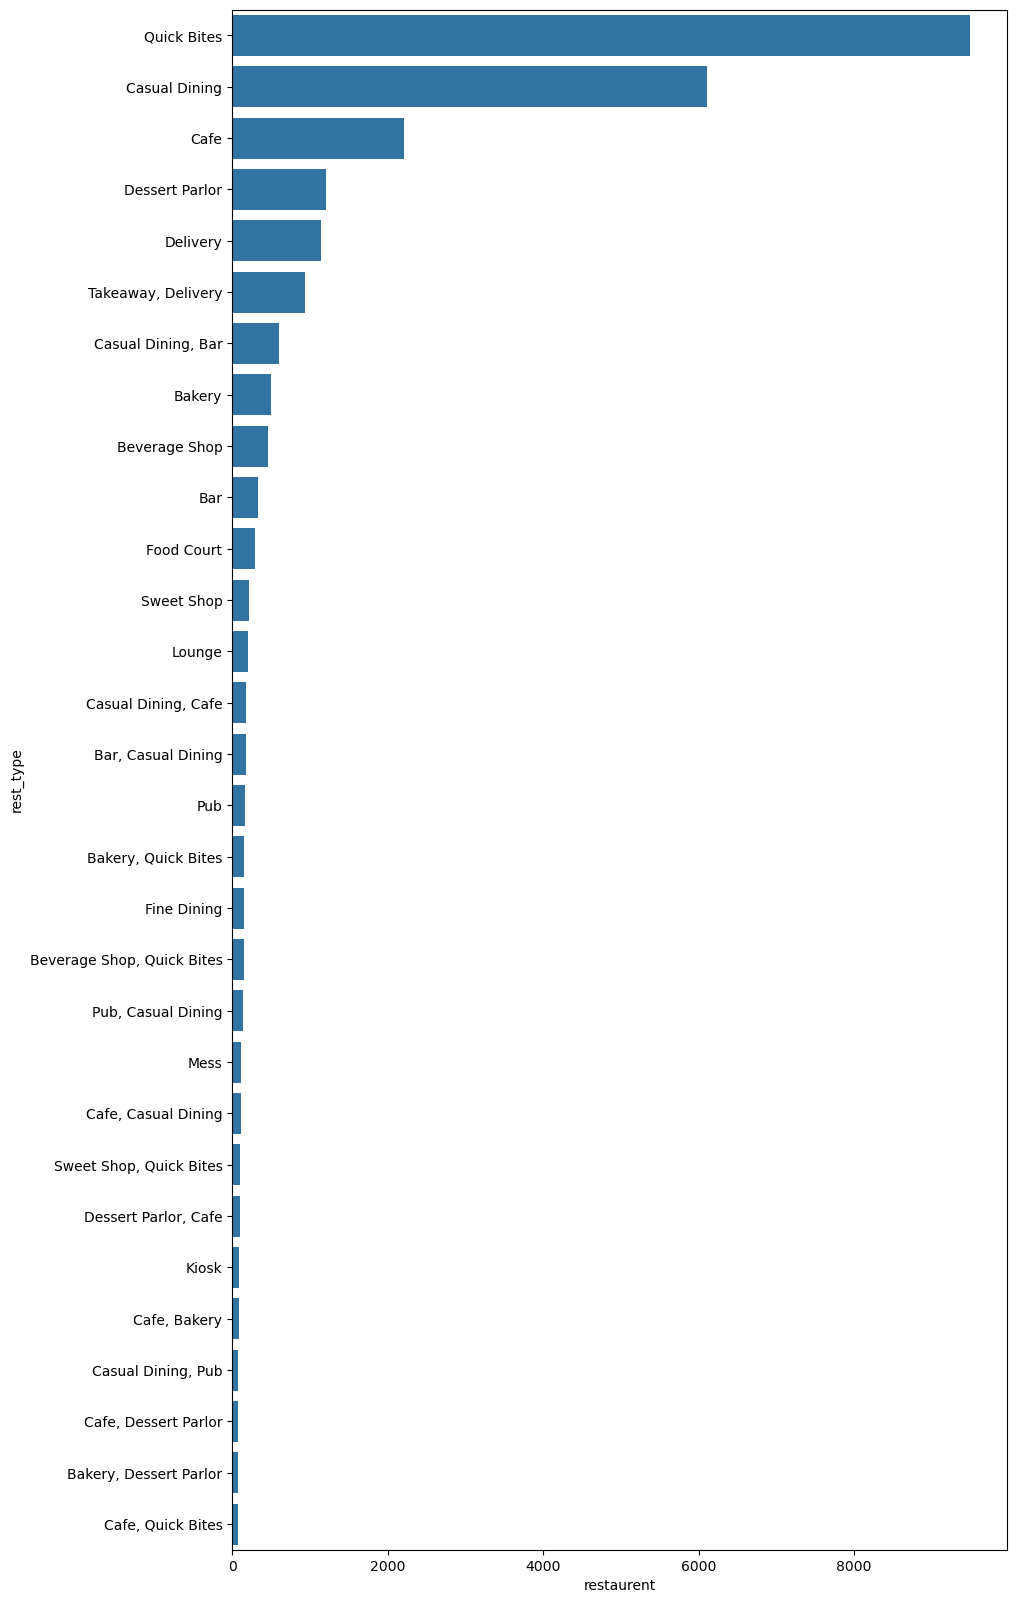

In [29]:
plt.figure(figsize=(10,20))
rest_types = data.groupby('rest_type')['restaurent'].count().reset_index()
sorted_rest_types = rest_types.sort_values('restaurent',ascending=False).head(30)
#print(sorted_rest_types)

rest_types.rest_type.count(), sns.barplot(x='restaurent',y='rest_type',data = sorted_rest_types, orient='h')

4. Find Cost's Of restaurants

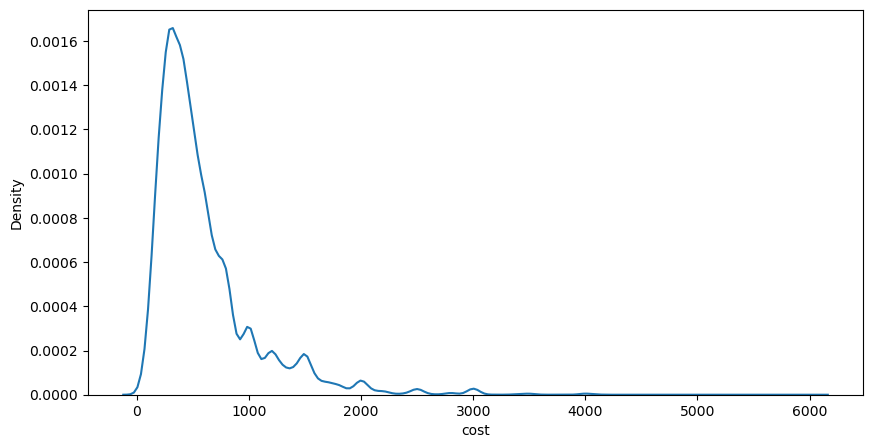

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(x='cost',data=data)
plt.show()

5. Find count of restaurants have table boking facility.

In [ ]:
data['book_table'].value_counts()

book_table
No     37062
Yes     6422
Name: count, dtype: int64

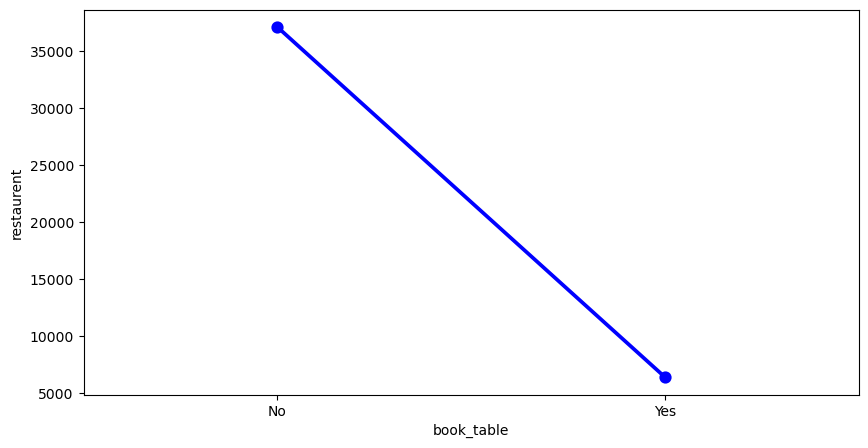

In [ ]:
plt.figure(figsize=(10,5))
table_booking = data.groupby('book_table')['restaurent'].count().reset_index()

sns.pointplot(x='book_table',y='restaurent',color='b',data=table_booking)
plt.show()

6. Find number of restaurant at given location.
- 'BTM'
- 'Basavanagudi'
- 'West Bangalore'
- 'Whitefield'
- 'Yeshwantpur'

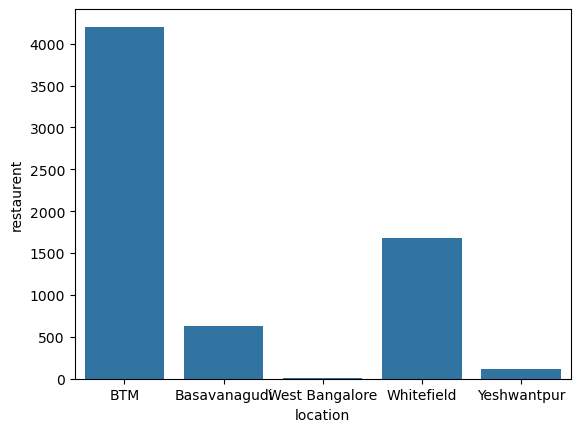

In [ ]:
df=pd.DataFrame(data.groupby('location')['restaurent'].count()).reset_index()

criteria=df['location'].isin(['BTM','Basavanagudi','West Bangalore','Whitefield','Yeshwantpur'])

sns.barplot(x='location',y='restaurent',data=df[criteria])
plt.show()